# Tensorflow playground with code

Remember when we played witht the tensorflow playground? Well let's do a quick exercise in order to recreate these examples but with code!

## Circle Problem

* 1️⃣ import `make_circles` from sklearn and create an object data containing circle data of 1000 observations, with some noise and a factor of your choice.



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from torchviz import make_dot

# Generate circular data
X_data, y_data = make_circles(n_samples=1000, noise=0.1, factor=0.5)

# Convert to PyTorch tensors
X = torch.tensor(X_data, dtype=torch.float32)
y = torch.tensor(y_data, dtype=torch.long)

* 2️⃣ Visualize the data

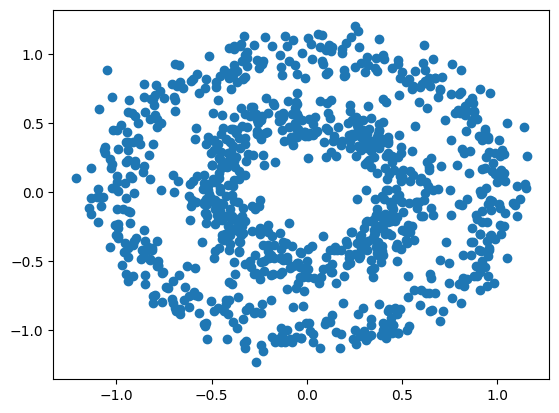

In [2]:
plt.scatter(x=X[:,0], y=X[:,1])

* 3️⃣ Split them in train and validation set with sklearn
* 4️⃣ Form two batch datasets, one for training data, one for validation data

In [3]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DataLoader for batches
train_dataset = data.TensorDataset(X_train, y_train)
val_dataset = data.TensorDataset(X_val, y_val)

train_loader = data.DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=4, shuffle=True)


* 5️⃣ Create a neural network model in order to make predictions on this dataset, try and make it as simple as possible.

In [4]:
class SimpleNN(nn.Module):

    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        
        return x

model = SimpleNN()
model

SimpleNN(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=4, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [5]:
# Create a dummy input tensor
dummy_input = torch.randn(10, 2)

# Get the model output
output = model(dummy_input)

# Create and display the computational graph
make_dot(output, params=dict(model.named_parameters())).render("model_architecture", format="png")


'model_architecture.png'

* 6️⃣ Compile the model using Adam and a loss function that suits our problem.

In [6]:
# Set up optimizer and loss function

# Adam optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Binary Cross Entropy Loss
criterion = nn.BCELoss()


* 7️⃣ Train the model over 100 epochs

In [7]:
def train(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    """
    Function to train a PyTorch model with training and validation datasets.
    
    Parameters:
    model: The neural network model to train.
    train_loader: DataLoader for the training dataset.
    val_loader: DataLoader for the validation dataset.
    criterion: Loss function (e.g., Binary Cross Entropy for classification).
    optimizer: Optimization algorithm (e.g., Adam, SGD).
    epochs: Number of training epochs (default=100).
    
    Returns:
    history: Dictionary containing loss and accuracy for both training and validation.
    """
    
    # Dictionary to store training & validation loss and accuracy over epochs
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
    
    for epoch in range(epochs):  # Loop over the number of epochs
        model.train()  # Set model to training mode
        total_loss, correct = 0, 0  # Initialize total loss and correct predictions
        
        # Training loop
        for inputs, labels in train_loader:
            optimizer.zero_grad()  # Reset gradients before each batch
            outputs = model(inputs).squeeze()  # Forward pass
            loss = criterion(outputs, labels.float())  # Compute loss
            loss.backward()  # Backpropagation (compute gradients)
            optimizer.step()  # Update model parameters
            
            total_loss += loss.item()  # Accumulate batch loss
            correct += ((outputs > 0.5) == labels).sum().item()  # Count correct predictions
        
        # Compute average loss and accuracy for training
        train_loss = total_loss / len(train_loader)
        train_acc = correct / len(train_loader.dataset)
        
        # Validation phase (without gradient computation)
        model.eval()  # Set model to evaluation mode
        val_loss, val_correct = 0, 0
        with torch.no_grad():  # No need to compute gradients during validation
            for inputs, labels in val_loader:
                outputs = model(inputs).squeeze()  # Forward pass
                loss = criterion(outputs, labels.float())  # Compute loss
                val_loss += loss.item()  # Accumulate validation loss
                val_correct += ((outputs > 0.5) == labels).sum().item()  # Count correct predictions
        
        # Compute average loss and accuracy for validation
        val_loss /= len(val_loader)
        val_acc = val_correct / len(val_loader.dataset)
        
        # Store metrics in history dictionary
        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['accuracy'].append(train_acc)
        history['val_accuracy'].append(val_acc)
        
        # Print training progress
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    return history  # Return training history

# Train the model
history = train(model, train_loader, val_loader, criterion, optimizer, epochs=100)

Epoch [1/100], Loss: 0.6727, Acc: 0.5100, Val Loss: 0.6610, Val Acc: 0.5450
Epoch [2/100], Loss: 0.6008, Acc: 0.6562, Val Loss: 0.5554, Val Acc: 0.7600
Epoch [3/100], Loss: 0.4546, Acc: 0.8300, Val Loss: 0.4002, Val Acc: 0.8300
Epoch [4/100], Loss: 0.3110, Acc: 0.8812, Val Loss: 0.2901, Val Acc: 0.8750
Epoch [5/100], Loss: 0.2251, Acc: 0.9500, Val Loss: 0.2155, Val Acc: 0.9700
Epoch [6/100], Loss: 0.1786, Acc: 0.9738, Val Loss: 0.1737, Val Acc: 0.9750
Epoch [7/100], Loss: 0.1455, Acc: 0.9838, Val Loss: 0.1521, Val Acc: 0.9750
Epoch [8/100], Loss: 0.1264, Acc: 0.9800, Val Loss: 0.1387, Val Acc: 0.9800
Epoch [9/100], Loss: 0.1122, Acc: 0.9838, Val Loss: 0.1257, Val Acc: 0.9750
Epoch [10/100], Loss: 0.0998, Acc: 0.9850, Val Loss: 0.1044, Val Acc: 0.9900
Epoch [11/100], Loss: 0.0851, Acc: 0.9950, Val Loss: 0.0957, Val Acc: 0.9900
Epoch [12/100], Loss: 0.0836, Acc: 0.9850, Val Loss: 0.0900, Val Acc: 0.9900
Epoch [13/100], Loss: 0.0758, Acc: 0.9925, Val Loss: 0.0856, Val Acc: 0.9850
Epoch [1

* 8️⃣ Plot the evolution of the train loss and the validation loss and the evolution of the train metric and the validation metric.

In [8]:
from plotly import graph_objects as go
fig = go.Figure(data=[
    go.Scatter(y=history['loss'], name="Training Loss", mode="lines"),
    go.Scatter(y=history['val_loss'], name="Validation Loss", mode="lines")
])
fig.update_layout(title='Training and Validation Loss', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()


In [9]:
fig = go.Figure(data=[
    go.Scatter(y=history['accuracy'], name="Training Accuracy", mode="lines"),
    go.Scatter(y=history['val_accuracy'], name="Validation Accuracy", mode="lines")
])
fig.update_layout(title='Training and Validation Accuracy', xaxis_title='Epochs', yaxis_title='Accuracy')
fig.show()


* 9️⃣ Did the model overfit ?

No it seemed rather that the model underfit! We should increase the learning rate or the number of neurons on our layers.

* 🔟 Can you try and plot the decision function of the model in the data space? Like we saw in the tensorflow playground? You can get inspiration <a href="https://plotly.com/python/knn-classification/"> here </a>

In [10]:
import numpy as np
x1_range = np.linspace(-1.5, 1.5, 100)
x2_range = np.linspace(-1.5, 1.5, 100)
x1, x2 = np.meshgrid(x1_range, x2_range)
x_test = np.array([[xx1, xx2] for xx1, xx2 in zip(x1.reshape(-1), x2.reshape(-1))])

x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
pred_test = model(x_test_tensor).detach().numpy().reshape(100, 100)

fig = go.Figure(data=[
    go.Contour(
        x=x1_range,
        y=x2_range,
        z=pred_test
    )
])
fig.add_trace(go.Scatter(x=X[:, 0], y=X[:, 1], mode="markers"))
fig.show()

## Spiral problem

* 1️⃣ Use the following code to produce some spiral data:

In [11]:
import numpy as np
import torch
import matplotlib.pyplot as plt

N = 1000
theta = np.sqrt(np.random.rand(N)) * 4 * np.pi

r_a = 2 * theta + np.pi
data_a = np.array([np.cos(theta) * r_a, np.sin(theta) * r_a]).T
x_a = data_a + np.random.randn(N, 2)
x_a = x_a / np.abs(x_a).max()

r_b = -2 * theta - np.pi
data_b = np.array([np.cos(theta) * r_b, np.sin(theta) * r_b]).T
x_b = data_b + np.random.randn(N, 2)
x_b = x_b / np.abs(x_b).max()

res_a = np.append(x_a, np.zeros((N, 1)), axis=1)
res_b = np.append(x_b, np.ones((N, 1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

X = torch.tensor(res[:, 0:2], dtype=torch.float32)
y = torch.tensor(res[:, -1], dtype=torch.long)

* 2️⃣ Split into train and validation set

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

* 3️⃣ Form a train and validation batch dataset

In [13]:
train_dataset = data.TensorDataset(X_train, y_train)
val_dataset = data.TensorDataset(X_val, y_val)

train_loader = data.DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = data.DataLoader(val_dataset, batch_size=8, shuffle=False)

* 4️⃣ Create a neural network model that can acheive good predictions on the train set (for now we do not care about overfitting)

In [16]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = SimpleNN()

* 5️⃣ Compile the model with the right loss and metric and Adam optimizer

In [17]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

* 6️⃣ Train the model over 100 epochs

In [26]:
def train(model, train_loader, val_loader, criterion, optimizer, epochs=100):
    history = {'loss': [], 'val_loss': [], 'accuracy': [], 'val_accuracy': []}
    
    for epoch in range(epochs):
        model.train()
        total_loss, correct = 0, 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs).squeeze()
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
            correct += ((outputs > 0.5) == labels).sum().item()
        
        train_loss = total_loss / len(train_loader)
        train_acc = correct / len(train_loader.dataset)
        
        # Validation
        model.eval()
        val_loss, val_correct = 0, 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                outputs = model(inputs).squeeze()
                loss = criterion(outputs, labels.float())
                val_loss += loss.item()
                val_correct += ((outputs > 0.5) == labels).sum().item()
        
        val_loss /= len(val_loader)
        val_acc = val_correct / len(val_loader.dataset)
        
        # Save history
        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['accuracy'].append(train_acc)
        history['val_accuracy'].append(val_acc)
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
    
    return history

# Train the model
history = train(model, train_loader, val_loader, criterion, optimizer, epochs=100)

Epoch [1/100], Loss: 0.6280, Acc: 0.6275, Val Loss: 0.5705, Val Acc: 0.6675
Epoch [2/100], Loss: 0.5269, Acc: 0.6419, Val Loss: 0.4588, Val Acc: 0.6350
Epoch [3/100], Loss: 0.4037, Acc: 0.7544, Val Loss: 0.3506, Val Acc: 0.8175
Epoch [4/100], Loss: 0.3510, Acc: 0.8056, Val Loss: 0.3262, Val Acc: 0.8275
Epoch [5/100], Loss: 0.3105, Acc: 0.8237, Val Loss: 0.2780, Val Acc: 0.8400
Epoch [6/100], Loss: 0.2757, Acc: 0.8344, Val Loss: 0.2300, Val Acc: 0.9100
Epoch [7/100], Loss: 0.2427, Acc: 0.8931, Val Loss: 0.1852, Val Acc: 0.9200
Epoch [8/100], Loss: 0.2283, Acc: 0.9075, Val Loss: 0.2538, Val Acc: 0.9075
Epoch [9/100], Loss: 0.1882, Acc: 0.9225, Val Loss: 0.1620, Val Acc: 0.9350
Epoch [10/100], Loss: 0.1610, Acc: 0.9350, Val Loss: 0.1561, Val Acc: 0.9300
Epoch [11/100], Loss: 0.1608, Acc: 0.9363, Val Loss: 0.1811, Val Acc: 0.9325
Epoch [12/100], Loss: 0.1963, Acc: 0.9213, Val Loss: 0.1664, Val Acc: 0.9350
Epoch [13/100], Loss: 0.1473, Acc: 0.9425, Val Loss: 0.5145, Val Acc: 0.8675
Epoch [1

* 7️⃣ Is the model overfitting? Use visualization

In [27]:
from plotly import graph_objects as go
fig = go.Figure(data=[
    go.Scatter(y=history['loss'], name="Training Loss", mode="lines"),
    go.Scatter(y=history['val_loss'], name="Validation Loss", mode="lines")
])
fig.update_layout(title='Training and Validation Loss', xaxis_title='Epochs', yaxis_title='Loss')
fig.show()

* 8️⃣ Visualize the decision boundary, would you say the model could benefit from some regularization?

In [28]:
x1_example = np.linspace(-1,1,100)
x2_example = np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1_example, x2_example)
example = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)

pred_example = model(example).detach().numpy().reshape(100, 100)

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example
    )
])
fig.add_trace(go.Scatter(x=X[:, 0],
                         y=X[:, 1],
                         mode="markers")
)
fig.show()

* 9️⃣ Create a new model and add regularization to each layer, train it and visualize the decision boundary

In [29]:
class RegularizedNN(nn.Module):
    def __init__(self):
        super(RegularizedNN, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.01)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.sigmoid(self.fc3(x))
        return x

model = RegularizedNN()
optimizer = optim.Adam(model.parameters(), lr=0.01,weight_decay=0.001)
train(model, train_loader, val_loader, criterion, optimizer, epochs=500)


Epoch [1/500], Loss: 0.6413, Acc: 0.6262, Val Loss: 0.6152, Val Acc: 0.6525
Epoch [2/500], Loss: 0.6295, Acc: 0.6412, Val Loss: 0.6122, Val Acc: 0.6725
Epoch [3/500], Loss: 0.6025, Acc: 0.6281, Val Loss: 0.5502, Val Acc: 0.6625
Epoch [4/500], Loss: 0.5286, Acc: 0.6344, Val Loss: 0.4909, Val Acc: 0.6200
Epoch [5/500], Loss: 0.4736, Acc: 0.6613, Val Loss: 0.4644, Val Acc: 0.6325
Epoch [6/500], Loss: 0.4708, Acc: 0.6919, Val Loss: 0.4403, Val Acc: 0.7000
Epoch [7/500], Loss: 0.4423, Acc: 0.6894, Val Loss: 0.4210, Val Acc: 0.7025
Epoch [8/500], Loss: 0.4381, Acc: 0.6963, Val Loss: 0.4214, Val Acc: 0.6825
Epoch [9/500], Loss: 0.4290, Acc: 0.7256, Val Loss: 0.4117, Val Acc: 0.7575
Epoch [10/500], Loss: 0.3927, Acc: 0.7738, Val Loss: 0.3869, Val Acc: 0.7975
Epoch [11/500], Loss: 0.3556, Acc: 0.8075, Val Loss: 0.3174, Val Acc: 0.8500
Epoch [12/500], Loss: 0.3150, Acc: 0.8431, Val Loss: 0.3049, Val Acc: 0.8600
Epoch [13/500], Loss: 0.2834, Acc: 0.8794, Val Loss: 0.2543, Val Acc: 0.9150
Epoch [1

{'loss': [0.6413433994352817,
  0.6294899700582027,
  0.602524790763855,
  0.5286213101446628,
  0.47357030484825374,
  0.47081638015806676,
  0.4423430693894625,
  0.4381066507101059,
  0.4290414799004793,
  0.39274844504892825,
  0.3556066724285483,
  0.31500912107527257,
  0.2834190915059298,
  0.2706612094421871,
  0.2573304067924619,
  0.24368399566039442,
  0.2340072232950479,
  0.2216649837139994,
  0.21176172780804337,
  0.21289569618646056,
  0.20081321112811565,
  0.19490024011582135,
  0.18872709434479476,
  0.1932700782082975,
  0.19114588326774537,
  0.17610483847558497,
  0.17148255689069627,
  0.16873604455031455,
  0.1729606290953234,
  0.16046533073298633,
  0.17214331413619222,
  0.1584254588605836,
  0.18293357229791582,
  0.1838262851629406,
  0.16345488015562296,
  0.1672884759074077,
  0.14807774296961726,
  0.1477462430205196,
  0.15277707654982806,
  0.14990712277591228,
  0.14942525441758334,
  0.1460189191997051,
  0.17395142756402493,
  0.15220573731698095,
 

In [30]:
x1_example = np.linspace(-1,1,100)
x2_example = np.linspace(-1,1,100)

x1, x2 = np.meshgrid(x1_example, x2_example)
example = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)

pred_example = model(example).detach().numpy().reshape(100, 100)

fig = go.Figure(data=[
    go.Contour(
        x=x1_example,
        y=x2_example,
        z=pred_example
    )
])
fig.add_trace(go.Scatter(x=X[:, 0],
                         y=X[:, 1],
                         mode="markers"
                         )
)
fig.show()